In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint as pp

%matplotlib inline 

#ignore all warnings
import warnings
warnings.filterwarnings('ignore')

In [44]:
#data
women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')

pp(women_degrees.info() )
#pp(women_degrees.describe())
women_degrees.head(3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 18 columns):
Year                             42 non-null int64
Agriculture                      42 non-null float64
Architecture                     42 non-null float64
Art and Performance              42 non-null float64
Biology                          42 non-null float64
Business                         42 non-null float64
Communications and Journalism    42 non-null float64
Computer Science                 42 non-null float64
Education                        42 non-null float64
Engineering                      42 non-null float64
English                          42 non-null float64
Foreign Languages                42 non-null float64
Health Professions               42 non-null float64
Math and Statistics              42 non-null float64
Physical Sciences                42 non-null float64
Psychology                       42 non-null float64
Public Administration            42 non-null float6

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1


In [45]:
# remplace df index  by a  Year column which is of type numeric
cols=list(women_degrees.columns)
date_field='Year'
cols.remove(date_field)
#women_degrees.loc[:,cols].head(2)
women_degrees_re=pd.DataFrame(np.array(women_degrees.loc[:,cols]),\
                              index=women_degrees[date_field],columns=cols )
women_degrees_re.head(3) #OK

,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
Year,,,,,,,,,,,,,,,,,
1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1


#### fig 1

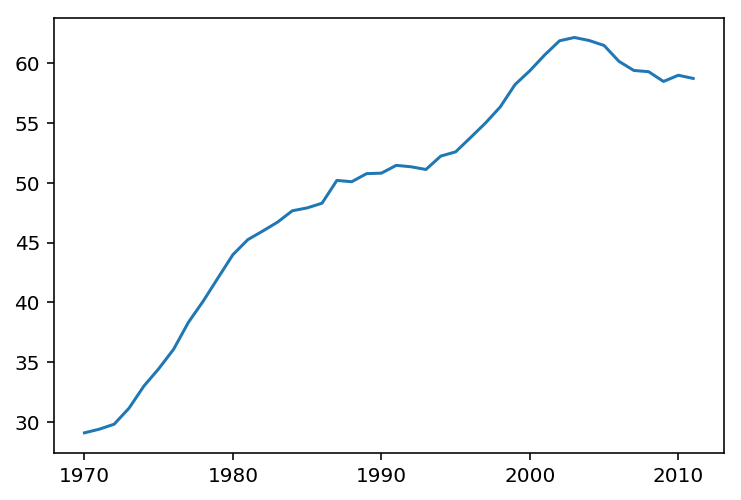

In [46]:
#make a fist basic chart
ig, ax = plt.subplots()
ax.plot(women_degrees['Year'],women_degrees['Biology'])
plt.show()

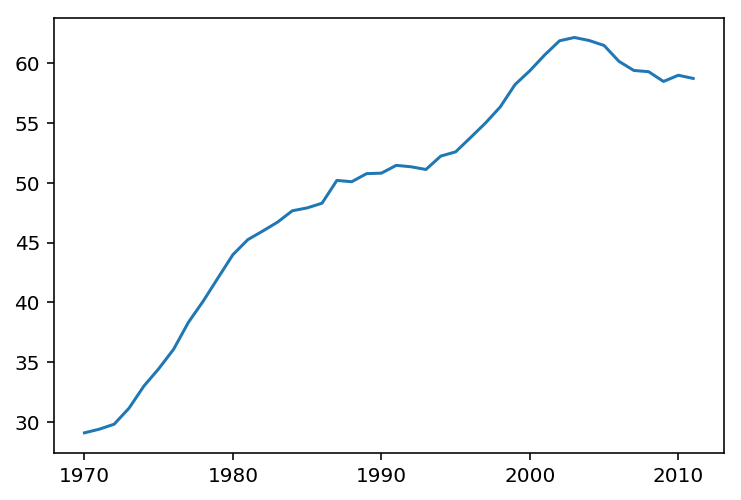

In [47]:
#make a fist basic chart alt
ig, ax = plt.subplots()
ax.plot(women_degrees_re.index,women_degrees_re['Biology'])
plt.show()

#### fig 4  two df columns on 1 chart with legend

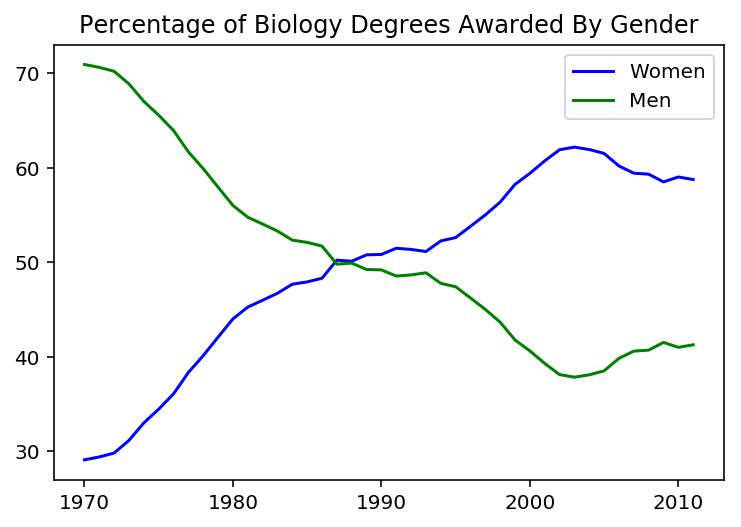

In [48]:
plt.plot(women_degrees['Year'], women_degrees['Biology'], c='blue', label='Women')
plt.plot(women_degrees['Year'], 100-women_degrees['Biology'], c='green', label='Men')
plt.legend(loc='upper right')
plt.title('Percentage of Biology Degrees Awarded By Gender')
plt.show()

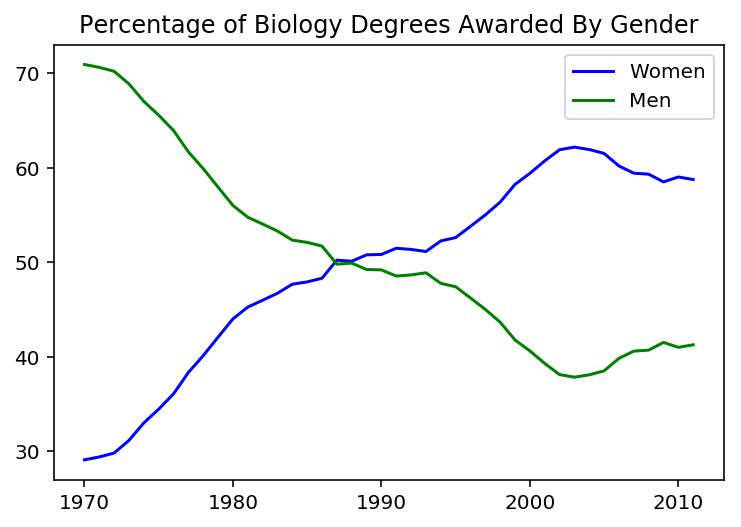

In [49]:
plt.plot(women_degrees_re.index, women_degrees_re['Biology'], c='blue', label='Women')
plt.plot(women_degrees_re.index, 100.0-women_degrees_re['Biology'], c='green', label='Men')
plt.legend(loc='upper right')
plt.title('Percentage of Biology Degrees Awarded By Gender')
plt.show()

### fig. 7 2 cols on 1 chart with better visuals , no frame

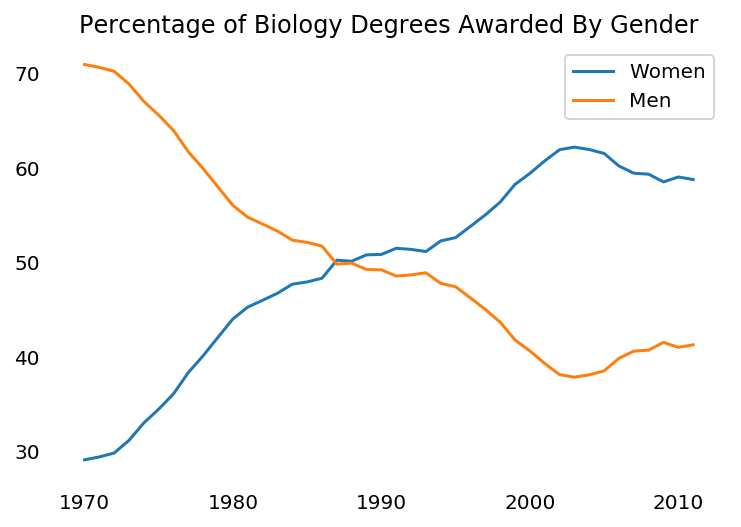

In [50]:
fig, ax = plt.subplots()  #colors are not specified
ax.plot(women_degrees['Year'], women_degrees['Biology'], label='Women')
ax.plot(women_degrees['Year'], 100-women_degrees['Biology'], label='Men')
ax.tick_params(bottom="off", top="off", left="off", right="off")
# Add your code here
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.legend(loc='upper right')
ax.set_title('Percentage of Biology Degrees Awarded By Gender')
plt.show()

### fig 8.  4 subplots 

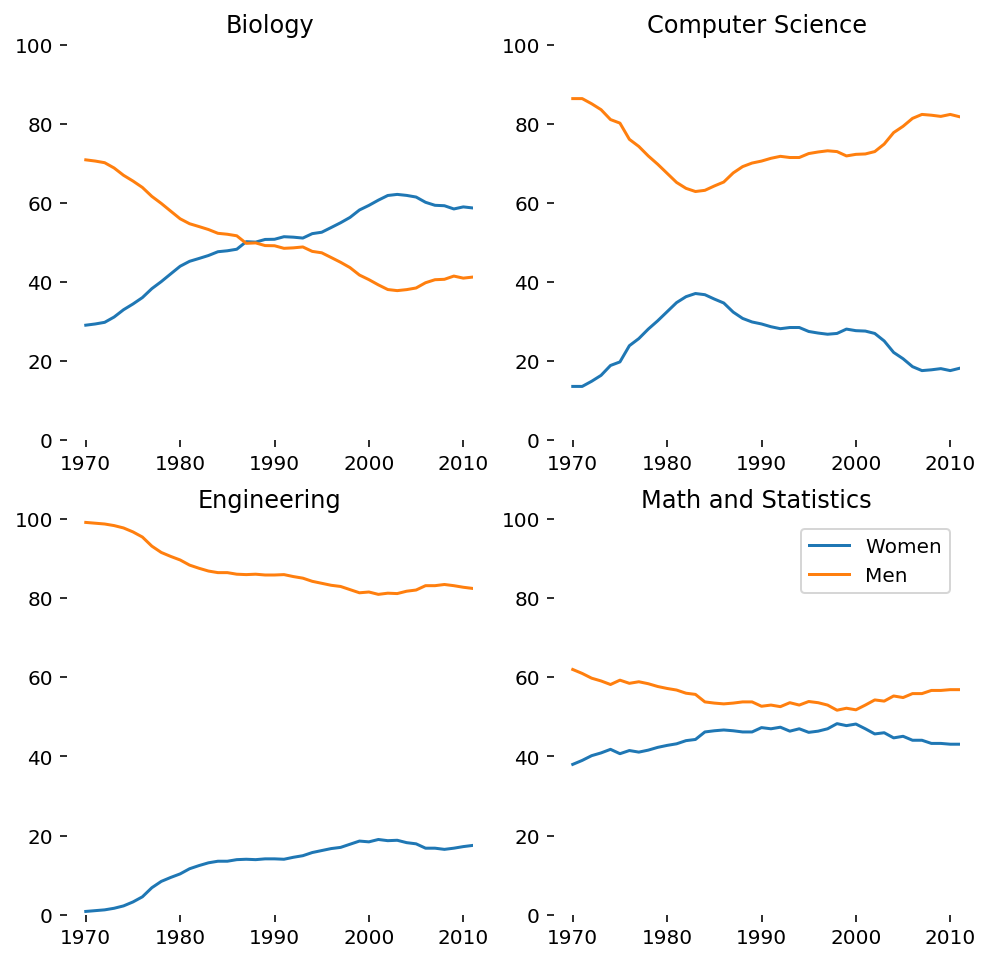

In [56]:
major_cats = ['Biology', 'Computer Science', 'Engineering', 'Math and Statistics']
fig = plt.figure(figsize=(8, 8)) #12

for sp in range(0,4):
    ax = fig.add_subplot(2,2,sp+1)  #here subplot layout 2 x 2 , 3rd param is index of current plot
    ax.plot(women_degrees['Year'], women_degrees[major_cats[sp]],  label='Women')
    ax.plot(women_degrees['Year'], 100-women_degrees[major_cats[sp]], label='Men')
    # Add your code here.
    ax.set_xlim(1968,2011)
    ax.set_ylim(0, 100)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_title(major_cats[sp])
# Calling pyplot.legend() here will add the legend to the last subplot that was created.
plt.legend(loc='upper right')
plt.show()

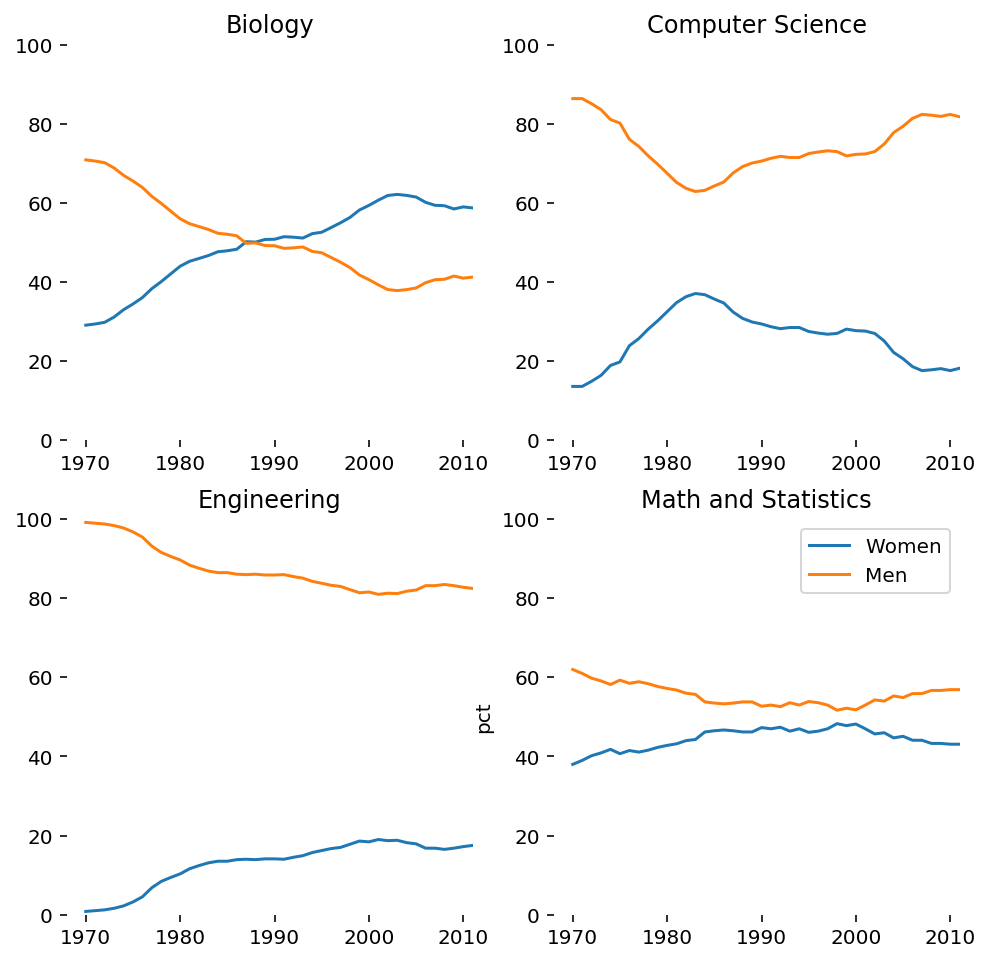

In [59]:
##alternative
major_cats = ['Biology', 'Computer Science', 'Engineering', 'Math and Statistics']
fig = plt.figure(figsize=(8, 8)) #12

for sp in range(0,4):
    ax = fig.add_subplot(2,2,sp+1) 
    ax.plot(women_degrees_re.index, women_degrees_re[major_cats[sp]],  label='Women')
    ax.plot(women_degrees_re.index, 100-women_degrees_re[major_cats[sp]], label='Men')
    # Add your code here.
    ax.set_xlim(1968,2011)
    ax.set_ylim(0, 100)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_title(major_cats[sp])
# Calling pyplot.legend() here will add the legend to the last subplot that was created.
plt.legend(loc='upper right')
plt.show()